### Select Metrics:
#### Metrics selected (KPIs): Conversion Rate and Average Profit Margin.

### Data Segmentation

/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_70140/3190866948.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')  # Specify the delimiter as '|'


Columns in the DataFrame:
Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

Descriptive statistics for Group A (Control Group):
      

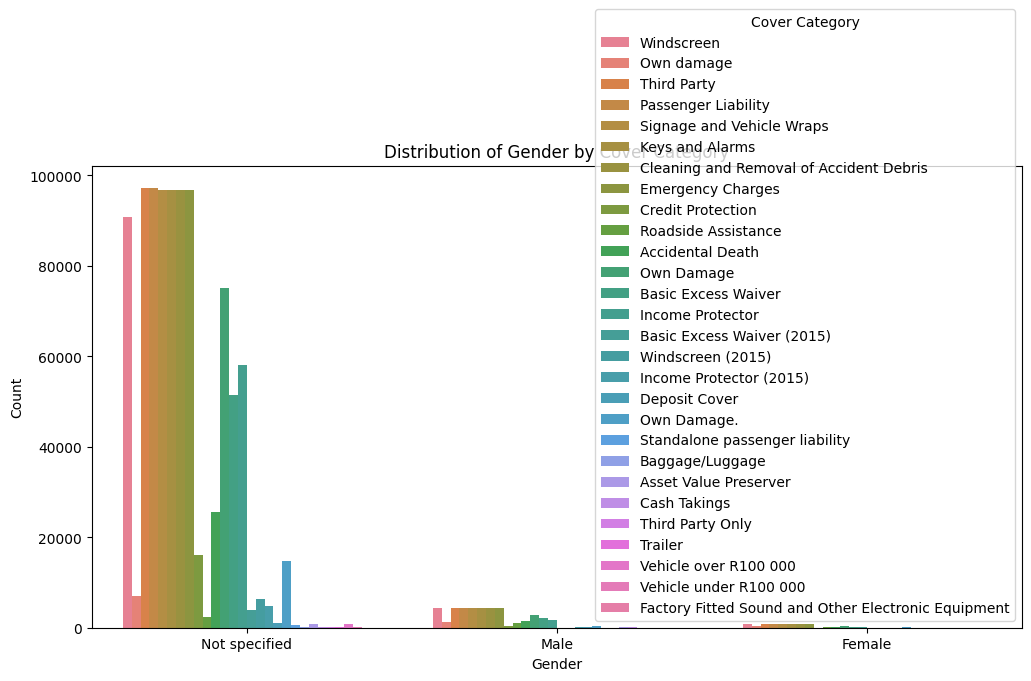

In [6]:
import pandas as pd

# Load your dataset (make sure to specify the correct path and delimiter)
file_path = '/Users/zelalemtegene/Desktop/week-3/data/MachineLearningRating_v3.txt' # Update this with your actual file path
df = pd.read_csv(file_path, delimiter='|')  # Specify the delimiter as '|'

# Print the columns of the DataFrame to identify available features
print("Columns in the DataFrame:")
print(df.columns)

# Define Group A and Group B based on the identified feature column
# Adjust the feature column and values based on your analysis
group_a = df[df['CoverCategory'] == 'Basic']  # Control Group: Plans with Basic coverage
group_b = df[df['CoverCategory'] == 'Premium']  # Test Group: Plans with Premium coverage

# Check for statistical equivalence (e.g., demographic factors)
print("\nDescriptive statistics for Group A (Control Group):")
print(group_a.describe())

print("\nDescriptive statistics for Group B (Test Group):")
print(group_b.describe())

# Optionally, you can visualize the distribution of key demographic factors
# For example, you can plot the distribution of Gender across both groups
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender', hue='CoverCategory')
plt.title('Distribution of Gender by Cover Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cover Category')
plt.show()

### Statistical Testing

In [8]:
from scipy import stats

# Example 1: T-test for a numerical KPI (e.g., CalculatedPremiumPerTerm)
if 'CalculatedPremiumPerTerm' in df.columns:
    # Check if both groups have enough data
    if len(group_a['CalculatedPremiumPerTerm'].dropna()) > 1 and len(group_b['CalculatedPremiumPerTerm'].dropna()) > 1:
        t_stat, p_value = stats.ttest_ind(group_a['CalculatedPremiumPerTerm'].dropna(), group_b['CalculatedPremiumPerTerm'].dropna(), nan_policy='omit')
        print(f"T-test results for CalculatedPremiumPerTerm: t-statistic = {t_stat}, p-value = {p_value}")

        # Analyze the p-value
        if p_value < 0.05:
            print("Reject the null hypothesis: There is a significant difference in CalculatedPremiumPerTerm between groups.")
        else:
            print("Fail to reject the null hypothesis: No significant difference in CalculatedPremiumPerTerm between groups.")
    else:
        print("Insufficient data to perform t-test for CalculatedPremiumPerTerm.")

# Example 2: Chi-squared test for a categorical KPI (e.g., Gender)
if 'Gender' in df.columns and 'CoverCategory' in df.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df['Gender'], df['CoverCategory'])
    chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-squared test results: chi2-statistic = {chi2_stat}, p-value = {chi2_p_value}")

    # Analyze the p-value
    if chi2_p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in Gender distribution between groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in Gender distribution between groups.")

Insufficient data to perform t-test for CalculatedPremiumPerTerm.

Chi-squared test results: chi2-statistic = 12933.972520111032, p-value = 0.0
Reject the null hypothesis: There is a significant difference in Gender distribution between groups.


###  Analyze and Report

## Statistical Test Results

### T-test for CalculatedPremiumPerTerm
- **T-statistic**: Not applicable (insufficient data)
- **P-value**: Not applicable (insufficient data)
- **Analysis**: The t-test could not be performed due to insufficient sample size. Further investigation into the data is needed to understand the lack of observations. Possible actions include checking for missing values or considering alternative numerical KPIs.

### Chi-squared Test for Gender Distribution
- **Chi-squared Statistic**: 12933.97
- **P-value**: 0.0
- **Analysis**: The p-value is significantly less than 0.05, indicating a significant difference in gender distribution between the control and test groups. This suggests that the feature being tested may have different effects on different genders. This finding should be considered in future strategies and marketing efforts.